
# Basic Text Features

In [1]:
import sys
import string
import nltk

import numpy as np
from typing import Iterable

import sklearn
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2

In [2]:
print(f'sklearn.__version__={sklearn.__version__}')

sklearn.__version__=1.3.0


In [3]:
# spacy
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter    = PorterStemmer()
lancaster = LancasterStemmer()
# nltk.download("wordnet")

In [4]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w)))

Word                PorterStemmer       LancasterStemmer    

dogs                dog                 dog                 
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
pass                pass                pass                
passing             pass                pass                
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
passed              pass                pass                
trouble             troubl              troubl              
troubling           troubl              troubl              
care                care                car                 
believes            bel

### Stemming

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stem(sentence):
    token_words = word_tokenize(sentence)
    sentence_stemmed = []
    for word in token_words:
        sentence_stemmed.append(porter.stem(word))
        sentence_stemmed.append(" ")
    return "".join(sentence_stemmed)


In [6]:
s = "J.K. Rowling wrote Harry Potter. She never expected the book to be famous."
stem(s)

'j.k. rowl wrote harri potter . she never expect the book to be famou . '

In [7]:
sent_tokenize(s)

['J.K. Rowling wrote Harry Potter.',
 'She never expected the book to be famous.']

In [8]:
# Be carefull separating phrases
s.split(".")

['J',
 'K',
 ' Rowling wrote Harry Potter',
 ' She never expected the book to be famous',
 '']

In [9]:
word_tokenize(s)

['J.K.',
 'Rowling',
 'wrote',
 'Harry',
 'Potter',
 '.',
 'She',
 'never',
 'expected',
 'the',
 'book',
 'to',
 'be',
 'famous',
 '.']

### Lemmatization


Lemmatization consists on properly use of a vocabulary and morphological analysis of words, aiming to remove inflectional endings only with the goal of returning any word to a set of base (or dictionary form) words.


`Lemmatize(saw) = see`


We will use a lemmatizer from WordNet (https://wordnet.princeton.edu) avaliable from nltk.


In [10]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [11]:
sentence = "I was running and eating. This was a terrible idea."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)


In [12]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
I                   I                   
was                 wa                  
running             running             
and                 and                 
eating              eating              
This                This                
was                 wa                  
a                   a                   
terrible            terrible            
idea                idea                


Notice that the words did no change!

This is because there was no context. If we give a part of speech type then the lemmatizer will do what we would expect.

In [13]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

Word                Lemma               
I                   I                   
was                 be                  
running             run                 
and                 and                 
eating              eat                 
This                This                
was                 be                  
a                   a                   
terrible            terrible            
idea                idea                


In [14]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster, wordnet_lemmatizer]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}{3:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__, wordnet_lemmatizer.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w), wordnet_lemmatizer.lemmatize(w)))

Word                PorterStemmer       LancasterStemmer    WordNetLemmatizer   

dogs                dog                 dog                 dog                 
destabilize         destabil            dest                destabilize         
misunderstanding    misunderstand       misunderstand       misunderstanding    
railroad            railroad            railroad            railroad            
moonlight           moonlight           moonlight           moonlight           
football            footbal             footbal             football            
pass                pass                pass                pas                 
passing             pass                pass                passing             
friendship          friendship          friend              friendship          
friends             friend              friend              friend              
friendships         friendship          friend              friendship          
passed              pass   

## Features for documents


### From docs to feature vectors: Make your own countvectorizer


Let us build a simple document classifier featurizing each document by word counts


In [15]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline
import sklearn.feature_extraction
import sklearn.datasets
import scipy
import scipy.sparse as sp

from sklearn.feature_extraction.text import CountVectorizer

In [16]:
X = sklearn.datasets.fetch_20newsgroups()

X_train = sklearn.datasets.fetch_20newsgroups(subset="train").data
y_train = sklearn.datasets.fetch_20newsgroups(subset="train").target
X_test  = sklearn.datasets.fetch_20newsgroups(subset="test").data
y_test  = sklearn.datasets.fetch_20newsgroups(subset="test").target

In [17]:
x = X_train[0]

In [18]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [19]:
print(x)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [20]:
y_train[0]

7

### Tiny function to create a feature matrix of word counts (feature counting)


In [21]:
from collections import defaultdict

docs = [['hello', 'world', 'hello'], ['goodbye', 'cruel', 'teacher', 'goodbye']]

def prepare_word_counts_with_dict(docs: Iterable[str], verbose=False):
    ind_ptr = [0]
    ind_col = []
    data = []
    vocabulary = {}
    
    for m, doc in enumerate(docs):
        word_ind_counter = defaultdict(int)  # document counter for each doc in X
        for word in doc: 
            vocabulary.setdefault(word, len(vocabulary))
            word_ind_counter[word] += 1
                
        data.extend(word_ind_counter.values())
        ind_ptr.append(ind_ptr[-1] + len(word_ind_counter))
        ind_col.extend([vocabulary[w] for w in word_ind_counter.keys()])
    
    if verbose:
        print(data)
        print(ind_col)
        print(ind_ptr)
    return (data, ind_col, ind_ptr)

sp.csr_matrix(prepare_word_counts_with_dict(docs, verbose=True)).toarray()

[2, 1, 2, 1, 1]
[0, 1, 2, 3, 4]
[0, 2, 5]


array([[2, 1, 0, 0, 0],
       [0, 0, 2, 1, 1]])

In [22]:
docs = [['hello', 'world', 'hello'], ['goodbye', 'cruel', 'teacher', 'goodbye']]

def prepare_word_counts_with_dict(docs: Iterable[str], verbose=False):
    ind_ptr = [0]
    ind_col = []
    data = []
    vocabulary = {}
    
    for m, doc in enumerate(docs):
        word_ind_counter = defaultdict(int)  # document counter for each doc in X
        for word in doc: 
            vocabulary.setdefault(word, len(vocabulary))
            word_ind_counter[word] += 1
                
        data.extend(word_ind_counter.values())
        ind_ptr.append(ind_ptr[-1] + len(word_ind_counter))
        ind_col.extend([vocabulary[w] for w in word_ind_counter.keys()])

    if verbose:
        print('len vocab =', len(vocabulary))
        print('vocab =', vocabulary)
        print('data =', data)
        print('ind_ptr =', ind_ptr)
        print('ind_col =', ind_col)
        
    return (data, ind_col, ind_ptr)

In [23]:
prepare_word_counts_with_dict(docs)

([2, 1, 2, 1, 1], [0, 1, 2, 3, 4], [0, 2, 5])

In [24]:
sp.csr_matrix(prepare_word_counts_with_dict(docs)).toarray()

array([[2, 1, 0, 0, 0],
       [0, 0, 2, 1, 1]])

We can create a bigger dataset to benchmark

In [25]:
docs_big = docs * 1000

In [26]:
%%timeit 
prepare_word_counts_with_dict(docs_big)

5.45 ms ± 467 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
sp.csr_matrix(prepare_word_counts_with_dict(docs_big))

<2000x5 sparse matrix of type '<class 'numpy.int32'>'
	with 5000 stored elements in Compressed Sparse Row format>

### Tiny function to create a feature matrix of word counts  (no feature counting)

We can create a CSR word count matrix without explicitly counting each word count.

- **Note**: `sp.csr_matrix` is smart enough to join counts of `data`, `ind_col` and `ind_ptr` that happen to be in the same coordinates.

In [28]:
docs = [['hello', 'world', 'hello'], ['goodbye', 'cruel', 'teacher']]

def prepare_word_counts0(docs: Iterable[str]):
    ind_ptr = [0]
    ind_col = []
    data = []
    vocabulary = {}
    
    for doc in docs:
        for w in doc:
            if w in vocabulary:
                index = vocabulary[w]
            else:
                index = len(vocabulary)
                vocabulary[w] = len(vocabulary)
            ind_col.append(index)
            data.append(1)
        ind_ptr.append(len(ind_col))
    return (data, ind_col, ind_ptr)

In [29]:
data, ind_col, ind_ptr = prepare_word_counts0(docs)
print(data)
print(ind_col)
print(ind_ptr)

[1, 1, 1, 1, 1, 1]
[0, 1, 0, 2, 3, 4]
[0, 3, 6]


In [30]:
sp.csr_matrix(prepare_word_counts0(docs)).toarray()

array([[2, 1, 0, 0, 0],
       [0, 0, 1, 1, 1]])

In [31]:
from collections import defaultdict
docs = [['hello', 'world', 'hello'], ['goodbye', 'cruel', 'teacher']]

def prepare_word_counts1(docs: Iterable[str]):
    ind_ptr = [0]
    ind_col = []
    data = []
    vocabulary = defaultdict(int)
    
    for doc in docs:
        for w in doc:
            index = vocabulary.setdefault(w, len(vocabulary))
            ind_col.append(index)
            data.append(1)
        ind_ptr.append(len(ind_col))
    
    return (data, ind_col, ind_ptr)

In [32]:
sp.csr_matrix(prepare_word_counts1(docs)).toarray()

array([[2, 1, 0, 0, 0],
       [0, 0, 1, 1, 1]])

#### Benchmarking  approaches

In [33]:
docs_big = docs*1000

In [34]:
%%timeit 
prepare_word_counts0(docs_big)

1.69 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [35]:
%%timeit 
prepare_word_counts1(docs_big)

2.23 ms ± 737 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [36]:
%%timeit 
prepare_word_counts_with_dict(docs_big)

4.53 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Customising Vectorizer classes

- **preprocessor**: a callable that takes an entire document as input (as a single string), and returns a possibly transformed version of the document, still as an entire string. This can be used to remove HTML tags, lowercase the entire document, etc.


- **tokenizer**: a callable that takes the output from the preprocessor and splits it into tokens, then returns a list of these.


- **analyzer**: a callable that replaces the preprocessor and tokenizer. The default analyzers all call the preprocessor and tokenizer, but custom analyzers will skip this. N-gram extraction and stop word filtering take place at the analyzer level, so a custom analyzer may have to reproduce these steps.

##### Example of how to encode sparse matrix fast


Notice that in order to build our data as a matrix we need to use sparse matrices due to the high dimensionality (number of words/features) of the vocabulary.

Here there is a little example to illustrate how we can build a csr_matrix (compressed sparse row matrix) fast.

In [37]:
X = np.array([[1,0,2],[2,1,0],[0,1,3]])
X

array([[1, 0, 2],
       [2, 1, 0],
       [0, 1, 3]])

In [38]:
data = [1,2,2,1,1,3]
row  = [0,0,1,1,2,2]
#ind_ptr = [0,3,4,9]
col = [0,2,0,1,1,2]
sp.csr_matrix( (data,(row,col)), shape=(3,3) ).todense()

matrix([[1, 0, 2],
        [2, 1, 0],
        [0, 1, 3]], dtype=int32)

#### Exercise: Build a Simple countvectorizer

Complete methods `fit` and `transform`


In [39]:
X_train[4], y_train[4]

('From: jcm@head-cfa.harvard.edu (Jonathan McDowell)\nSubject: Re: Shuttle Launch Question\nOrganization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA\nDistribution: sci\nLines: 23\n\nFrom article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...\n>>>"Clear caution & warning memory.  Verify no unexpected\n>>>errors. ...".  I am wondering what an "expected error" might\n>>>be.  Sorry if this is a really dumb question, but\n> \n> Parity errors in memory or previously known conditions that were waivered.\n>    "Yes that is an error, but we already knew about it"\n> I\'d be curious as to what the real meaning of the quote is.\n> \n> tom\n\n\nMy understanding is that the \'expected errors\' are basically\nknown bugs in the warning system software - things are checked\nthat don\'t have the right values in yet because they aren\'t\nset till after launch, and suchlike. Rather tha

In [40]:
# "David's car"

In [41]:
import scipy
import scipy.sparse as sp
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import defaultdict
import re
stemmer =  SnowballStemmer(language='english')

class SimpleCountVectorizer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    
    def __init__(self,
                 min_word_counts=1,
                 doc_cleaner_pattern=r"[^a-zA-Z]",
                 token_pattern=r"(?u)\b\w\w+\b",
                 dtype=np.float32,
                 doc_cleaner_func=None,
                 tokenizer_func=None,
                 word_transformer_func=None):
        
        self._retype = type(re.compile('hello, world'))

        self.min_word_counts     = min_word_counts
        self.doc_cleaner_pattern = doc_cleaner_pattern
        self.token_pattern       = token_pattern
        self.dtype               = dtype
        
        self.doc_cleaner_func      = doc_cleaner_func
        self.tokenizer_func        = tokenizer_func
        self.word_transformer_func = word_transformer_func

        self.word_to_pos = {}


    def build_doc_cleaner(self, lower=True):
        """
        Returns a function that cleans undesirable substrings in a string.
        It also lowers the input string if lower=True
        """
        if self.doc_cleaner_func:
            return self.doc_cleaner_func
        else:
            if isinstance(self.doc_cleaner_pattern, self._retype):
                clean_doc_pattern = re.compile(self.doc_cleaner_pattern)
            else:
                clean_doc_pattern = re.compile(self.doc_cleaner_pattern)

            if lower:
                 return lambda doc: clean_doc_pattern.sub(" ", doc).lower()
            else:
                 return lambda doc: clean_doc_pattern.sub(" ", doc)

    def build_tokenizer(self):
        """Returns a function that splits a string into a sequence of tokens"""
        if self.tokenizer_func:
            return self.tokenizer_func
        
        else:
            token_pattern = re.compile(self.token_pattern)
            return lambda doc: token_pattern.findall(doc)

    def build_word_transformer(self):
        """Returns a stemmer or lemmatizer if object has any"""
        
        if self.word_transformer_func:
            return self.word_transformer_func
        else:
            return lambda word: word
        
    def tokenize(self, doc):
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        doc     = doc_cleaner(doc)
        words = doc_tokenizer(doc)
            
        return words
        
    def fit(self, X):

        assert isinstance(X,list), "X is expected to be a list of documents"
        
        i = 0
        word_to_pos = {}
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        word_transformer = self.build_word_transformer()
        
        for x in X:
            x     = doc_cleaner(x)
            words = doc_tokenizer(x)
            for word in words:
                word = word_transformer(word)                  
                if word not in word_to_pos:
                    word_to_pos[word] = i
                    i = i + 1

        #self.doc_cleaner = doc_cleaner
        #self.doc_tokenizer = doc_tokenizer
        #self.word_transformer = word_transformer
        
        self.word_to_pos = word_to_pos            
        self.n_features = len(self.word_to_pos)
        return self
    
    def transform(self, X):
        """
        Implements a transform where counts are created at runtime and kept with a dict
        """
        
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        word_transformer = self.build_word_transformer()      
        
        col_indices = []
        row_indices = []
        sp_data     = []
        
        for m, doc in enumerate(X):
            doc = doc_cleaner(doc)
            word_ind_counter = defaultdict(int)  # document counter for each doc in X
            for word in doc_tokenizer(doc):
                word = word_transformer(word)   
                if word in self.word_to_pos:
                    word_ind_counter[self.word_to_pos[word]] +=1 # word count aggregation

            sp_data.extend(word_ind_counter.values())
            row_indices.extend([m]*len(word_ind_counter))
            col_indices.extend(word_ind_counter.keys())

        encoded_X = sp.csr_matrix((sp_data,(row_indices,col_indices)),
                                   shape=(len(X), self.n_features),
                                   dtype=self.dtype)
        
        return encoded_X

    def fit_transform(self, X, y=None):
        word_to_pos = {}
        doc_cleaner      = self.build_doc_cleaner()
        doc_tokenizer    = self.build_tokenizer()
        word_transformer = self.build_word_transformer()
        
        data = []
        ind_col = []
        ind_ptr = [0]
        
        for x in X:
            x     = doc_cleaner(x)
            words = doc_tokenizer(x)
            for word in words:
                word = word_transformer(word)                  
                index = word_to_pos.setdefault(word, len(word_to_pos))
                ind_col.append(index)
                data.append(1)
            ind_ptr.append(len(ind_col))
                           
        self.word_to_pos = word_to_pos            
        self.n_features = len(self.word_to_pos)
        self.word_to_pos = word_to_pos
        
        #self.doc_cleaner = doc_cleaner
        #self.doc_tokenizer = doc_tokenizer
        #self.word_transformer = word_transformer
        
        X_transformed = sp.csr_matrix((data, ind_col, ind_ptr))
        return X_transformed

###  Training a document classifier with `SimpleCountVectorizer`

In [42]:
vainilla_count_vectorizer = SimpleCountVectorizer( doc_cleaner_func=lambda doc: doc)
vainilla_count_vectorizer.fit(X_train)

SimpleCountVectorizer(doc_cleaner_func=<function <lambda> at 0x0000020EBFAB0D30>)

In [43]:
vainilla_count_vectorizer.transform(X_train)

<11314x155448 sparse matrix of type '<class 'numpy.float32'>'
	with 1899366 stored elements in Compressed Sparse Row format>

In [44]:
X_train_ = vainilla_count_vectorizer.transform(X_train)
logistic = sklearn.linear_model.LogisticRegression(C=0.1, max_iter=50)
logistic.fit(X_train_, y_train)

c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=50)

In [45]:
np.mean(logistic.predict(X_train_) == y_train.flatten())

0.9847975958988864

#### I) No Stemmer and no doc_cleaner

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vainilla_count_vectorizer = CountVectorizer()

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_0 = sklearn.pipeline.Pipeline([("countvectorizer", vainilla_count_vectorizer),
                                         ("logisticregression", logistic)])

In [47]:
model_pipe_0.steps

[('countvectorizer', CountVectorizer()),
 ('logisticregression', LogisticRegression(C=0.1))]

In [48]:
model_pipe_0.fit(X_train[0:100],y_train[0:100])

c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(C=0.1))])

In [49]:
model_pipe_0.predict(X_train[0:100])

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4,  8, 19,  4, 14,  6,  0,  1,
        7, 12,  5,  0, 10,  6,  2,  4,  1, 12,  9, 15,  7,  6, 13, 12, 17,
       18, 10,  8, 11,  8, 16,  9,  4,  3,  9,  9,  4,  4,  8, 12, 14,  5,
       15,  2, 13, 17, 11,  7, 10,  2, 14, 12,  5,  4,  6,  7,  0, 11, 16,
        0,  6, 17,  7, 12,  7,  3, 12, 11,  7,  2,  2,  0, 16,  1,  2,  7,
        3,  2,  1, 10, 12, 12, 17, 12,  2,  8,  8, 18,  5,  0,  1])

In [50]:
%%time
model_pipe_0.fit(X_train,y_train)
y_test_pred  = model_pipe_0.predict(X_test)
y_train_pred = model_pipe_0.predict(X_train)

c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: total: 4min 38s
Wall time: 2min 14s


In [51]:
model_pipe_0.steps[0][1].transform(X_train)

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [52]:
acc_train_0 = np.mean(y_train == y_train_pred)
acc_test_0 = np.mean(y_test == y_test_pred)
print("Accuracy train: {}    Accuracy test: {}".format(acc_train_0, acc_test_0))

Accuracy train: 0.9983206646632491    Accuracy test: 0.791157727031333


#### II) No stemmer but doc_cleaner

In [53]:
simple_count_vectorizer = SimpleCountVectorizer(doc_cleaner_pattern=re.compile("[^a-zA-Z]"))
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_1 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer),
                                        ("logisticregression", logistic)])

In [54]:
%%time
model_pipe_1.fit(X_train,y_train)

CPU times: total: 3min 15s
Wall time: 1min 20s


c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 SimpleCountVectorizer(doc_cleaner_pattern=re.compile('[^a-zA-Z]'))),
                ('logisticregression', LogisticRegression(C=0.1))])

In [55]:
y_test_pred  = model_pipe_1.predict(X_test)
y_train_pred = model_pipe_1.predict(X_train)

acc_train_1 = np.mean(y_train == y_train_pred)
acc_test_1 = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_1, acc_test_1))

Accuracy train: 0.9978787343114726    Accuracy test: 0.7871747211895911


#### III) Use a SnowballStemmer

In [56]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(word_transformer_func= SnowballStemmer('english').stem,
                                                        doc_cleaner_pattern=re.compile("[^a-zA-Z]"))

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_2 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer_stemmer),
                                        ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [57]:
%%time
model_pipe_2.fit(X_train,y_train)

y_test_pred  = model_pipe_2.predict(X_test)
y_train_pred = model_pipe_2.predict(X_train)

acc_train_2 = np.mean(y_train == y_train_pred)
acc_test_2  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_2, acc_test_2))

c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy train: 0.9982322785928938    Accuracy test: 0.790493892724376
CPU times: total: 5min 20s
Wall time: 4min 32s


#### Table with results for each pipeline

In [58]:
import pandas as pd

In [59]:
df_results = pd.DataFrame()
df_results["no clean no stem"]   = [acc_train_0, acc_test_0]
df_results["yes clean no stem"]  = [acc_train_1, acc_test_1]
df_results["yes clean yes stem"] = [acc_train_2, acc_test_2]
df_results.index=["train","test"] 

In [60]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem
train,0.998321,0.997879,0.998232
test,0.791158,0.787175,0.790494



###   Ngram features with Sklearn vectorizer


####  IV) Training a document classifier with sklearn `CountVectorizer`

In [61]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_3 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                          ("logisticregression", logistic)])


In [62]:
%%time
model_pipe_3.fit(X_train,y_train)

y_test_pred  = model_pipe_3.predict(X_test)
y_train_pred = model_pipe_3.predict(X_train)

acc_train_3 = np.mean(y_train == y_train_pred)
acc_test_3  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_3, acc_test_3))

c:\Users\mecheste\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy train: 0.9983206646632491    Accuracy test: 0.791157727031333
CPU times: total: 5min 9s
Wall time: 3min 11s


In [63]:
df_results["sklearn countvectorizer"] = [acc_train_3, acc_test_3]

In [64]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer
train,0.998321,0.997879,0.998232,0.998321
test,0.791158,0.787175,0.790494,0.791158


#### V) Training a document classifier with sklearn `CountVectorizer` and ngrams

In [65]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_4 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                          ("logisticregression", logistic)])

In [ ]:
%%time
model_pipe_4.fit(X_train,y_train)

y_test_pred  = model_pipe_4.predict(X_test)
y_train_pred = model_pipe_4.predict(X_train)

acc_train_4 = np.mean(y_train == y_train_pred)
acc_test_4  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_4, acc_test_4))

In [67]:
model_pipe_4.steps[0][1].transform(X_train[0:1])

<1x1181803 sparse matrix of type '<class 'numpy.int64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [ ]:
df_results["sklearn countvectorizer 2gram"] = [acc_train_4, acc_test_4]

In [69]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer
train,0.998321,0.997879,0.998232,0.998321
test,0.791158,0.787175,0.790494,0.791158


<Axes: >

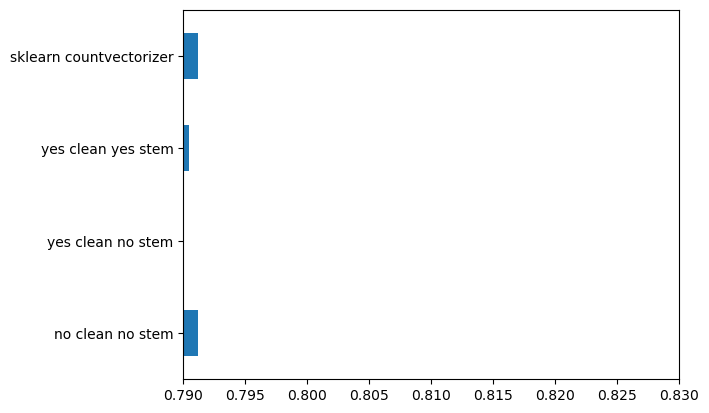

In [70]:
%matplotlib inline
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))

##  Feature selection

###  SelectKbest 

In [71]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))
feature_selector = SelectKBest(chi2, k = 700000)
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_5 = sklearn.pipeline.Pipeline([("count_vectorizer", count_vectorizer),
                                          ("feature_selector", feature_selector),
                                          ("logisticregression", logistic)])

In [ ]:
%%time
model_pipe_5.fit(X_train, y_train)

In [ ]:
acc_train = np.mean(model_pipe_5.predict(X_train) == y_train)
acc_test = np.mean(model_pipe_5.predict(X_test) == y_test)
df_results["sklearn countvectorizer 2gram + selection"] = [acc_train, acc_test]

In [ ]:
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))

###  Feature Union

In [74]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(word_transformer_func= SnowballStemmer('english').stem,
                                                        doc_cleaner_pattern=re.compile("[^a-zA-Z]"))

count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))

In [75]:
union = sklearn.pipeline.FeatureUnion([("simple_count_vectorizer_stemmer", simple_count_vectorizer_stemmer),
                                       ("count_vectorizer", count_vectorizer)])

In [76]:
logistic = sklearn.linear_model.LogisticRegression(C=0.1)
feature_selector = SelectKBest(chi2, k = 700000)
model_pipe_6 = sklearn.pipeline.Pipeline([("union_vectorizers", union),
                                          ("feature_selector", feature_selector),
                                          ("logisticregression", logistic)])

In [ ]:
%%time
model_pipe_6.fit(X_train, y_train)

In [ ]:
acc_train = np.mean(model_pipe_6.predict(X_train) == y_train)
acc_test = np.mean(model_pipe_6.predict(X_test) == y_test)
df_results["Feature union + selection"] = [acc_train, acc_test]

In [ ]:
df_results.T["test"].plot(kind="barh", xlim=(0.79,0.83))